In [1]:
# 母分散・母平均が既知のときの平均値の検定
sample <- c(13,14,7,12,10,8,6,15,4,14,9,6,10,12,5,12,8,8,12,15)
Z <- (mean(sample) - 12) / sqrt(10/length(sample))
Z

[1] -2.828427

[1] "bottom: -1.959964, top: 1.959964"

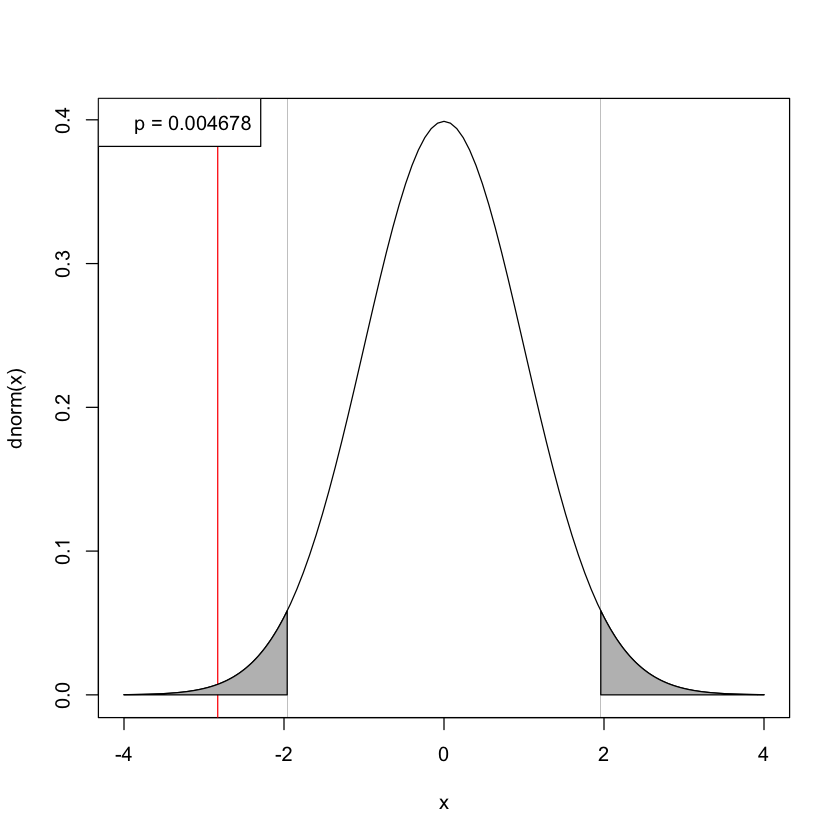

In [72]:
alpha <- 0.05
bottom = qnorm(alpha/2)
top = qnorm(1-alpha/2)
sprintf("bottom: %f, top: %f", bottom, top)
## 描画
curve(dnorm(x),-4,4)
abline(v=top,lwd=0.2)
abline(v=bottom,lwd=0.2)
abline(v=Z,col="red")
## 棄却域を色付け
xvals <- seq(top, 4, length=1000)
yvals <- dnorm(xvals)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
xvals <- seq(-4, bottom, length=1000)
yvals <- dnorm(xvals)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topleft", legend=sprintf("p = %f",2*pnorm(Z)), bg="white")

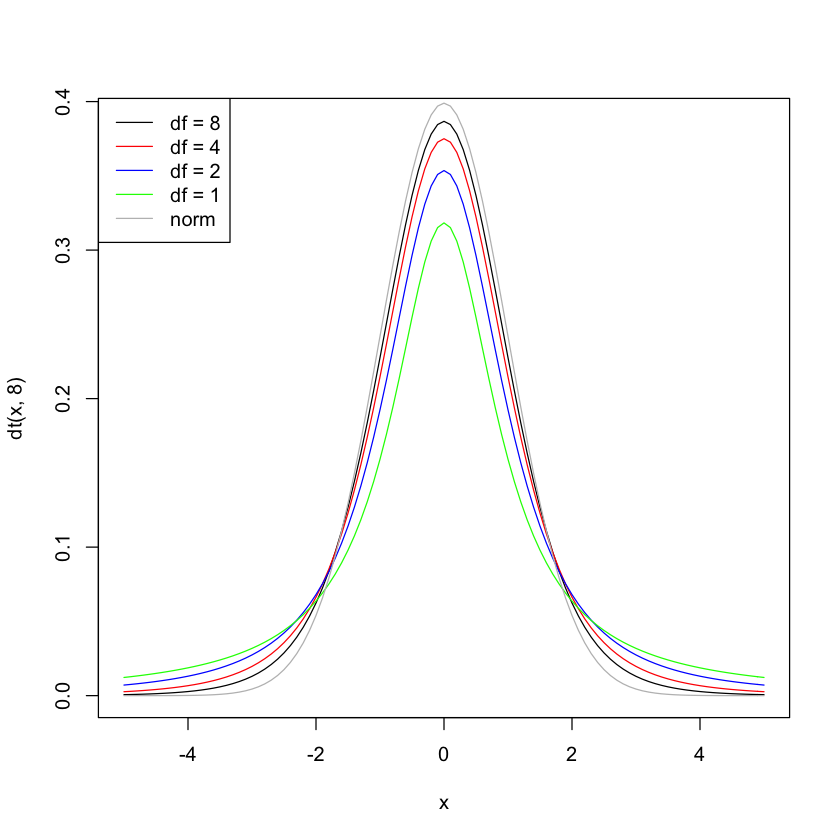

In [70]:
# 母分散が未知、母平均が既知のときの平均値の検定（t検定）
## t分布
curve(dt(x,8),-5,5)
curve(dt(x,4),-5,5,add=TRUE,col="red")
curve(dt(x,2),-5,5,add=TRUE,col="blue")
curve(dt(x,1),-5,5,add=TRUE,col="green")
curve(dnorm(x),-5,5,add=TRUE,col="gray")
legend("topleft",legend=c("df = 8","df = 4","df = 2","df = 1","norm"),lty=1,col=c("black","red","blue","green","gray"))

In [49]:
## t検定
t <- (mean(sample) - 12) / sqrt( var(sample) / length(sample) )
t

[1] -2.616648

[1] "bottom: -2.093024, top: 2.093024"

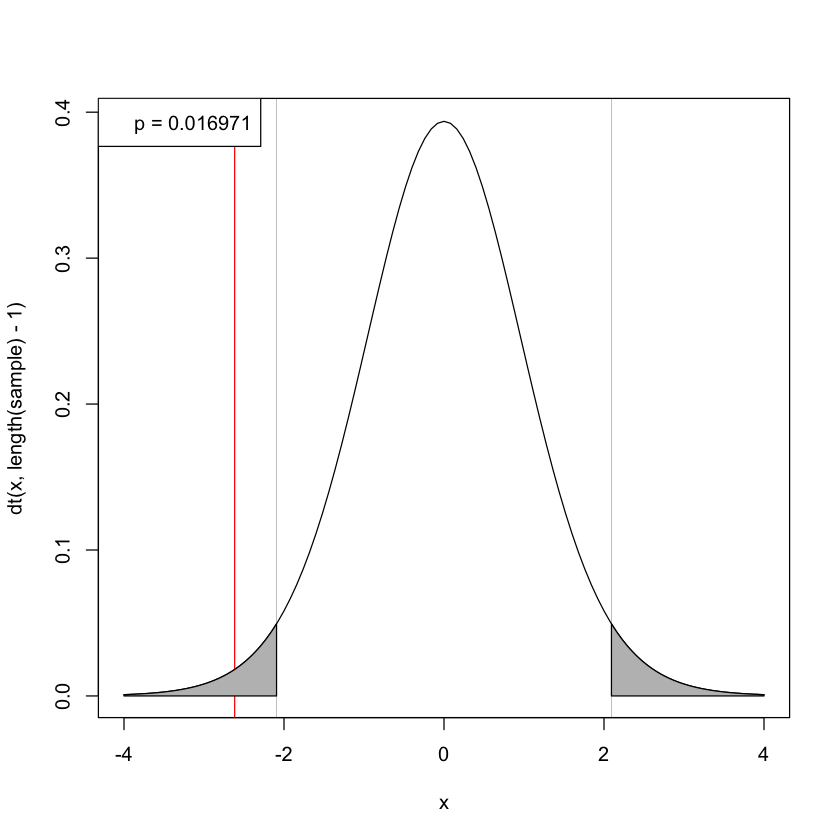

In [87]:
alpha <- 0.05
bottom <- qt(alpha/2, length(sample)-1)
top <- qt(1-alpha/2, length(sample)-1)
sprintf("bottom: %f, top: %f", bottom, top)
## 描画
curve(dt(x,length(sample)-1),-4,4)
abline(v=top,lwd=0.2)
abline(v=bottom,lwd=0.2)
abline(v=t,col="red")
## 棄却域を色付け
xvals <- seq(top, 4, length=1000)
yvals <- dt(xvals,length(sample)-1)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
xvals <- seq(-4, bottom, length=1000)
yvals <- dt(xvals,length(sample)-1)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topleft", legend=sprintf("p = %f",2*pt(t,length(sample)-1)), bg="white")

In [86]:
## 1行でt検定を行うコマンドもある
t.test(sample,mu=12,conf.level=0.95)


	One Sample t-test

data:  sample
t = -2.6166, df = 19, p-value = 0.01697
alternative hypothesis: true mean is not equal to 12
95 percent confidence interval:
  8.400225 11.599775
sample estimates:
mean of x 
       10 


In [90]:
# 相関係数の検定（無相関検定）
sample1 <- c(6,10,6,10,5,3,5,9,3,3,11,6,11,9,7,5,8,7,7,9)
sample2 <- c(10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7)
## 標本相関
sample_r <- cor(sample1, sample2)
## 自由度 N-2 のt分布に従う変数に変換
t <- sample_r * sqrt(length(sample1) - 2) / sqrt(1 - sample_r^2)
t

[1] 4.805707

[1] "bottom: -2.100922, top: 2.100922"

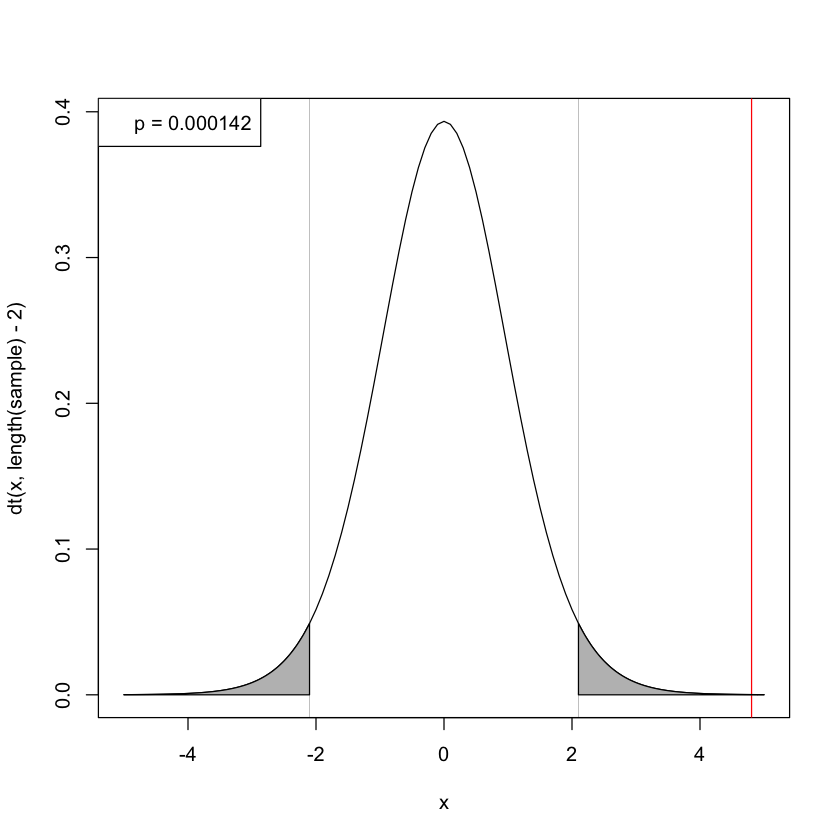

In [94]:
alpha <- 0.05
bottom <- qt(alpha/2, length(sample1)-2)
top <- qt(1-alpha/2, length(sample1)-2)
sprintf("bottom: %f, top: %f", bottom, top)
## 描画
curve(dt(x,length(sample)-2),-5,5)
abline(v=top,lwd=0.2)
abline(v=bottom,lwd=0.2)
abline(v=t,col="red")
## 棄却域を色付け
xvals <- seq(top, 5, length=1000)
yvals <- dt(xvals,length(sample)-2)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
xvals <- seq(-5, bottom, length=1000)
yvals <- dt(xvals,length(sample)-2)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topleft", legend=sprintf("p = %f",2*pt(t,length(sample)-2,lower.tail=FALSE)), bg="white") # t>0 なので上側確率を求める

In [97]:
## 1行で無相関検定を行うコマンドもある
cor.test(sample1,sample2,conf.level=0.95)


	Pearson's product-moment correlation

data:  sample1 and sample2
t = 4.8057, df = 18, p-value = 0.0001416
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4596086 0.8952048
sample estimates:
     cor 
0.749659 


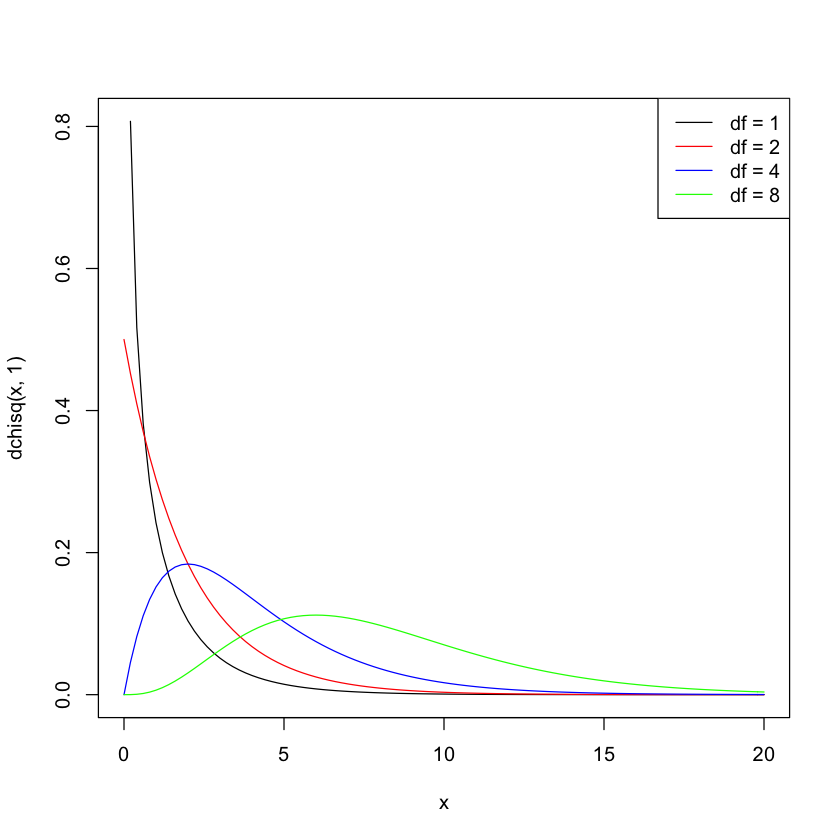

In [101]:
# 独立性の検定（カイ二乗検定）
## カイ二乗分布
curve(dchisq(x,1),0,20)
curve(dchisq(x,2),0,20,add=TRUE,col="red")
curve(dchisq(x,4),0,20,add=TRUE,col="blue")
curve(dchisq(x,8),0,20,add=TRUE,col="green")
legend("topright",legend=c("df = 1","df = 2","df = 4","df = 8"),lty=1,col=c("black","red","blue","green"),bg="white")

In [121]:
## 実際のデータ（数学が好きか嫌いか、統計が好きか嫌いか）
math <- c("x","x","o","o","x","x","x","x","x","o","o","x","o","x","x","o","x","x","x","x")
stat <- c("o","o","o","o","x","x","x","x","x","x","o","o","o","x","o","x","x","x","x","x")
rbind(math,stat)
table(math, stat)
xx <- sum(paste(math,stat,sep="") == "xx")
xo <- sum(paste(math,stat,sep="") == "xo")
ox <- sum(paste(math,stat,sep="") == "ox")
oo <- sum(paste(math,stat,sep="") == "oo")
math_o <- sum(math == "o")
math_x <- sum(math == "x")
stat_o <- sum(stat == "o")
stat_x <- sum(stat == "x")
total <- oo + xo + ox + xx
data <- c(xx, xo, ox, oo)
## 連関がないときの期待値
exp_xx <- math_x * stat_x / total
exp_xo <- math_x * stat_o / total
exp_ox <- math_o * stat_x / total
exp_oo <- math_o * stat_o / total
exp <- c(exp_xx, exp_xo, exp_ox, exp_oo)
## カイ二乗要素
square_chi_elem <- (data - exp)^2 / exp
square_chi_elem
square_chi <- sum(square_chi)
square_chi

math,x,x,o,o,x,x,x,x,x,o,o,x,o,x,x,o,x,x,x,x
stat,o,o,o,o,x,x,x,x,x,x,o,o,o,x,o,x,x,x,x,x


    stat
math  o  x
   o  4  2
   x  4 10

[1] 0.3047619 0.4571429 0.7111111 1.0666667

[1] 2.539683

[1] "boundary: 3.841459"

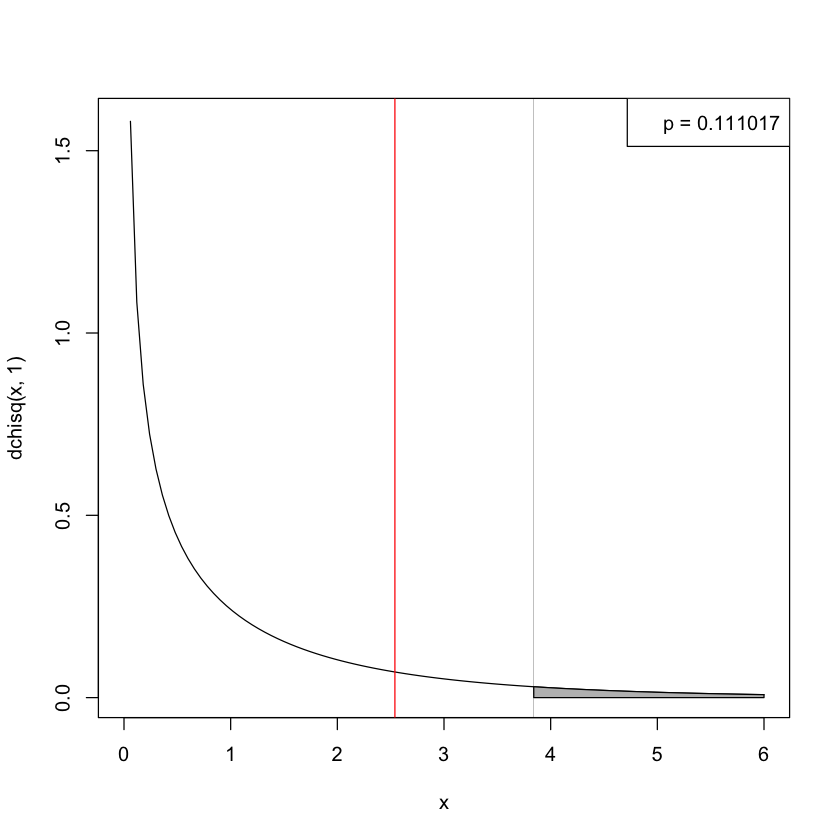

In [123]:
alpha <- 0.05
boundary <- qchisq(1-alpha, 1)
sprintf("boundary: %f", boundary)
## 描画
curve(dchisq(x,1),0,6)
abline(v=boundary,lwd=0.2)
abline(v=square_chi,col="red")
## 棄却域を色付け
xvals <- seq(boundary, 6, length=1000)
yvals <- dchisq(xvals,1)
polygon(c(xvals,rev(xvals)),c(rep(0,1000),rev(yvals)),col="gray")
legend("topright", legend=sprintf("p = %f",pchisq(square_chi,1,lower.tail=FALSE)), bg="white") # カイ二乗分布は正なので片側検定

In [125]:
## 1行でカイ二乗検定を行うコマンドもある
chisq.test(table(math,stat),correct=FALSE)

Warning message in chisq.test(table(math, stat), correct = FALSE):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(math, stat)
X-squared = 2.5397, df = 1, p-value = 0.111
